<a href="https://colab.research.google.com/github/yunju-1118/EWHA/blob/2025-1-Statistical-Methods-for-Big-Data-Analysis/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 2**

## **1. 기본 통계량 계산**

In [3]:
# import package
import numpy as np
import pandas as pd
import scipy as sp

# 예제 데이터 생성
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])

기본적인 통계량 계산

In [7]:
# sum
print(sum(fish_data))

# mean
print(np.mean(fish_data))

# variance
sigma = np.var(fish_data, ddof=1)
print(sigma)

#standard variance
print(np.sqrt(sigma))
print(np.std(fish_data, ddof=1))

# max, min
print(np.max(fish_data))
print(np.min(fish_data))

# quantile
print(np.quantile(fish_data, .25))
print(np.quantile(fish_data, .5))
print(np.quantile(fish_data, .75))

40
4.0
1.3333333333333333
1.1547005383792515
1.1547005383792515
6
2
3.25
4.0
4.75


## **2. sklearn of machine learning**


### (1) Built-in dataset
- load_iris( )
- load_diabetes( )
- load_digits( )
- load_linnerud( )
- load_wine( )
- load_breast_cancer( )

### (2) Dataset
build-in dataset은 sklearn.utils.Bunch라는 자료구조를 활용한다. key-value 형식으로 구성되어 있으며, dictionary형 타입과 유사한 구조를 갖는다. 공통 key는 다음과 같다.

- **data**: feature(X), numpy 배열 형태 또는 Matrix
- **target**: target(Y), numpy 배열 형태 또는 Matrix
- **Feature_names**: feature 데이터(X)의 이름
- **target_names**: target 데이터(Y)의 이름
- **DESCR**: 데이터 셋에 대한 설명
- **filename**: 데이터 셋의 파일 저장 위치(csv)

## **3. Regression**
통계적 분석 방법은 크게 regression과 classification으로 나뉜다. regression은 Y(종속변수, target)가 numeric인 경우, classification은 Y가 categorical인 경우 이용한다. 방법은 다르지만 두 분석 방법의 목적은 모두 예측값을 구하기 위함이다.

regression은 통계적 분석 방법의 하나로 데이터에 있는 독립변수들과 종속변수 사이의 관계를 모델링하여 예측값을 구하는 방법이다. regression은 크게 simple linear regression과 multiple linear regression으로 나뉜다. single linear regression의 경우 하나의 X(설명변수, feature)값을 이용하는 모델이고, multiple linear regression은 여러 개의 X(multiple featuers)를 이용해 Y를 예측하는 모델이다.

### (1) Python for Regression

In [8]:
# import package
from sklearn.linear_model import LinearRegression

# 모델 정의
model = LinearRegression()

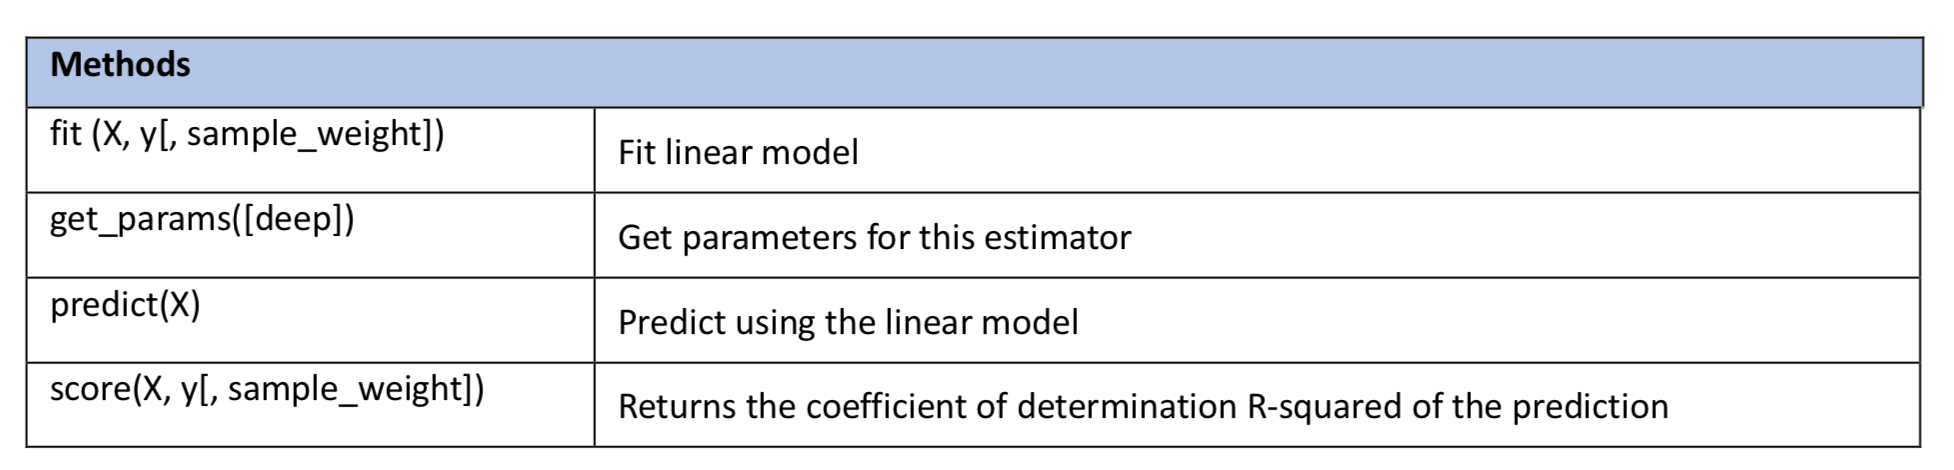

linear regression model의 intercept와 coefficient는 아래의 과정을 통해 확인할 수 있다.

```
# intercept
model.intercept_

# coefficient
model.coef_
```



### (2) simple linear regression(SLR)


#### a) import the dataset

In [10]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# library for regression
from sklearn.linear_model import LinearRegression
from sklearn import datasets

# 그래프 배경화면을 격자 회색으로 설정
sns.set_theme(color_codes = True)

YearsExperience(경력)과 Salary(월급)에 관한 data import

In [15]:
# load dataset
mydata = pd.read_csv("https://raw.githubusercontent.com/sudarshan-koirala/Salary-Prediciton-based-on-Years-of-Experience/master/Salary_Data.csv")
mydata.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### b) data preprocessing

In [32]:
X = mydata.iloc[:,:-1].values
Y = mydata.iloc[:,1].values

#### c) model fitting

In [33]:
# model fitting
from sklearn.linear_model import LinearRegression
mymodel = LinearRegression()
mymodel.fit(X,Y)

LinearRegression()

In [34]:
# result
print(f'intercept: {mymodel.intercept_}')
print(f'slope: {mymodel.coef_[0]}')

intercept: 25792.200198668696
slope: 9449.962321455076


-> sklearn의 linear regression은 OLS 방법을 이용하여 model fitting을 한다.

#### d) Test model

추정된 model이 좋은 성능을 보이는지 판단해 본다. 먼저, 데이터와 추정된 model을 시각화하여 그림을 통해 관찰한다.

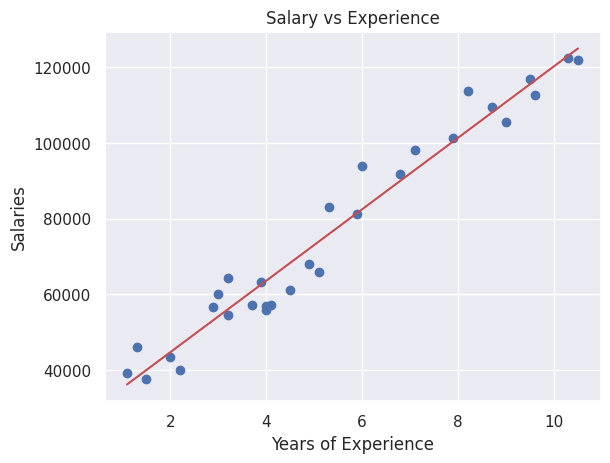

In [35]:
# Plotting the observation
plt.scatter(X,Y,color="b")

# Plotting the regression line
plt.plot(X, mymodel.predict(X), color='r')
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salaries")
plt.show()

fitting된 model이 observation들을 지나가고 있는 것을 확인할 수 있다.

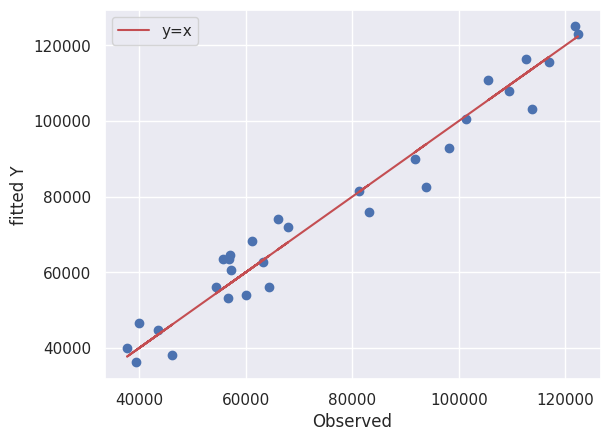

In [36]:
# Plotting the observed and fitted value
plt.scatter(Y, mymodel.predict(X), color="b")
plt.plot(Y, Y, color="r", label="y=x")
plt.xlabel("Observed")
plt.ylabel("fitted Y")
plt.legend()
plt.show()

$Y_i$와 $\hat{Y}_i$이 y=x 위에 분포되어 있으므로 model이 예측값을 잘 추정하고 있음을 확인할 수 있다.

다음으로 $R^2$를 이용하여 model의 성능을 판단해본다.

fitting하는 model의 성능 지표를 어떤 방법을 이용하여 반환하는지 알기 위해 help를 이용한다.

In [37]:
help(LinearRegression.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
        is the number of sample

In [38]:
print(round(mymodel.score(X,Y),3))

0.957


$R^2$의 값이 0.957로 매우 높다.

- statsmodels

statsmodels package의 summary 함수의 결과와 비교한다.

In [39]:
import statsmodels.api as sm
X = sm.add_constant(X) # intercept 항 추가
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.14e-20
Time:                        15:35:50   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# intercept 항 추가
X_df = pd.DataFrame(X)
print(X_df.head())

     0    1
0  1.0  1.1
1  1.0  1.3
2  1.0  1.5
3  1.0  2.0
4  1.0  2.2


분석에 필요한 파라미터를 빼내는 방법

In [43]:
# extract coefficient
print("=====================")
print("model parameter")
print("=====================")
print(model.params)
print("=====================")

# extract R-squared
print("R-square")
print("=====================")
print(model.rsquared)
print("=====================")

# extract t-value
print("t-values")
print("=====================")
print(model.tvalues)

model parameter
[25792.20019867  9449.96232146]
R-square
0.9569566641435086
t-values
[11.34693968 24.95009424]


### (3) multiple linear regression(MLR)
multiple linear regression(MLR)은 multiple regression으로 불리기도 하며, 한 개의 반응변수(Y)를 예측하기 위해 여러 개의 설명변수(X)를 이용하는 방법이다. 설명변수가 여러개인 수식은 다음과 같은 형태가 된다.

$ Y= \beta_0 + \beta_1X_1 + ... + \beta_pX_p + e$

MLR은 직선의 형태가 아니지만, 각 계수와 변수들 사이의 관계는 여전히 선형이므로 선형 모형이다.

최소제곱법을 이용한 fitting, fitted value, residual의 정의 등 SLR에서 다룬 개념은 MLR에도 그대로 확장되어 적용된다.


#### a) import the dataset

diabetes 데이터를 이용해 MLR의 회귀식을 추정해보자.

In [44]:
# import package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# library for regression
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [45]:
# import dataset
mydata = datasets.load_diabetes()
mydata.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

dataset을 data frame으로 만들자

In [47]:
# feature columns
df = pd.DataFrame(mydata['data'], columns = mydata['feature_names'])

# target column 추가
df['diabetes_score'] = mydata['target']

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_score
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [48]:
print('target: diabetes(당뇨병 수치)')

for i, feature_name in enumerate(mydata.feature_names):
  print(f'feature{i+1}: {feature_name}')

target: diabetes(당뇨병 수치)
feature1: age
feature2: sex
feature3: bmi
feature4: bp
feature5: s1
feature6: s2
feature7: s3
feature8: s4
feature9: s5
feature10: s6


우선, corr( )과 pairplot( )을 이용해 target과 변수들 간의 correlation을 관찰한다.

In [50]:
df.corr().tail(1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_score
diabetes_score,0.187889,0.043062,0.58645,0.441482,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.0


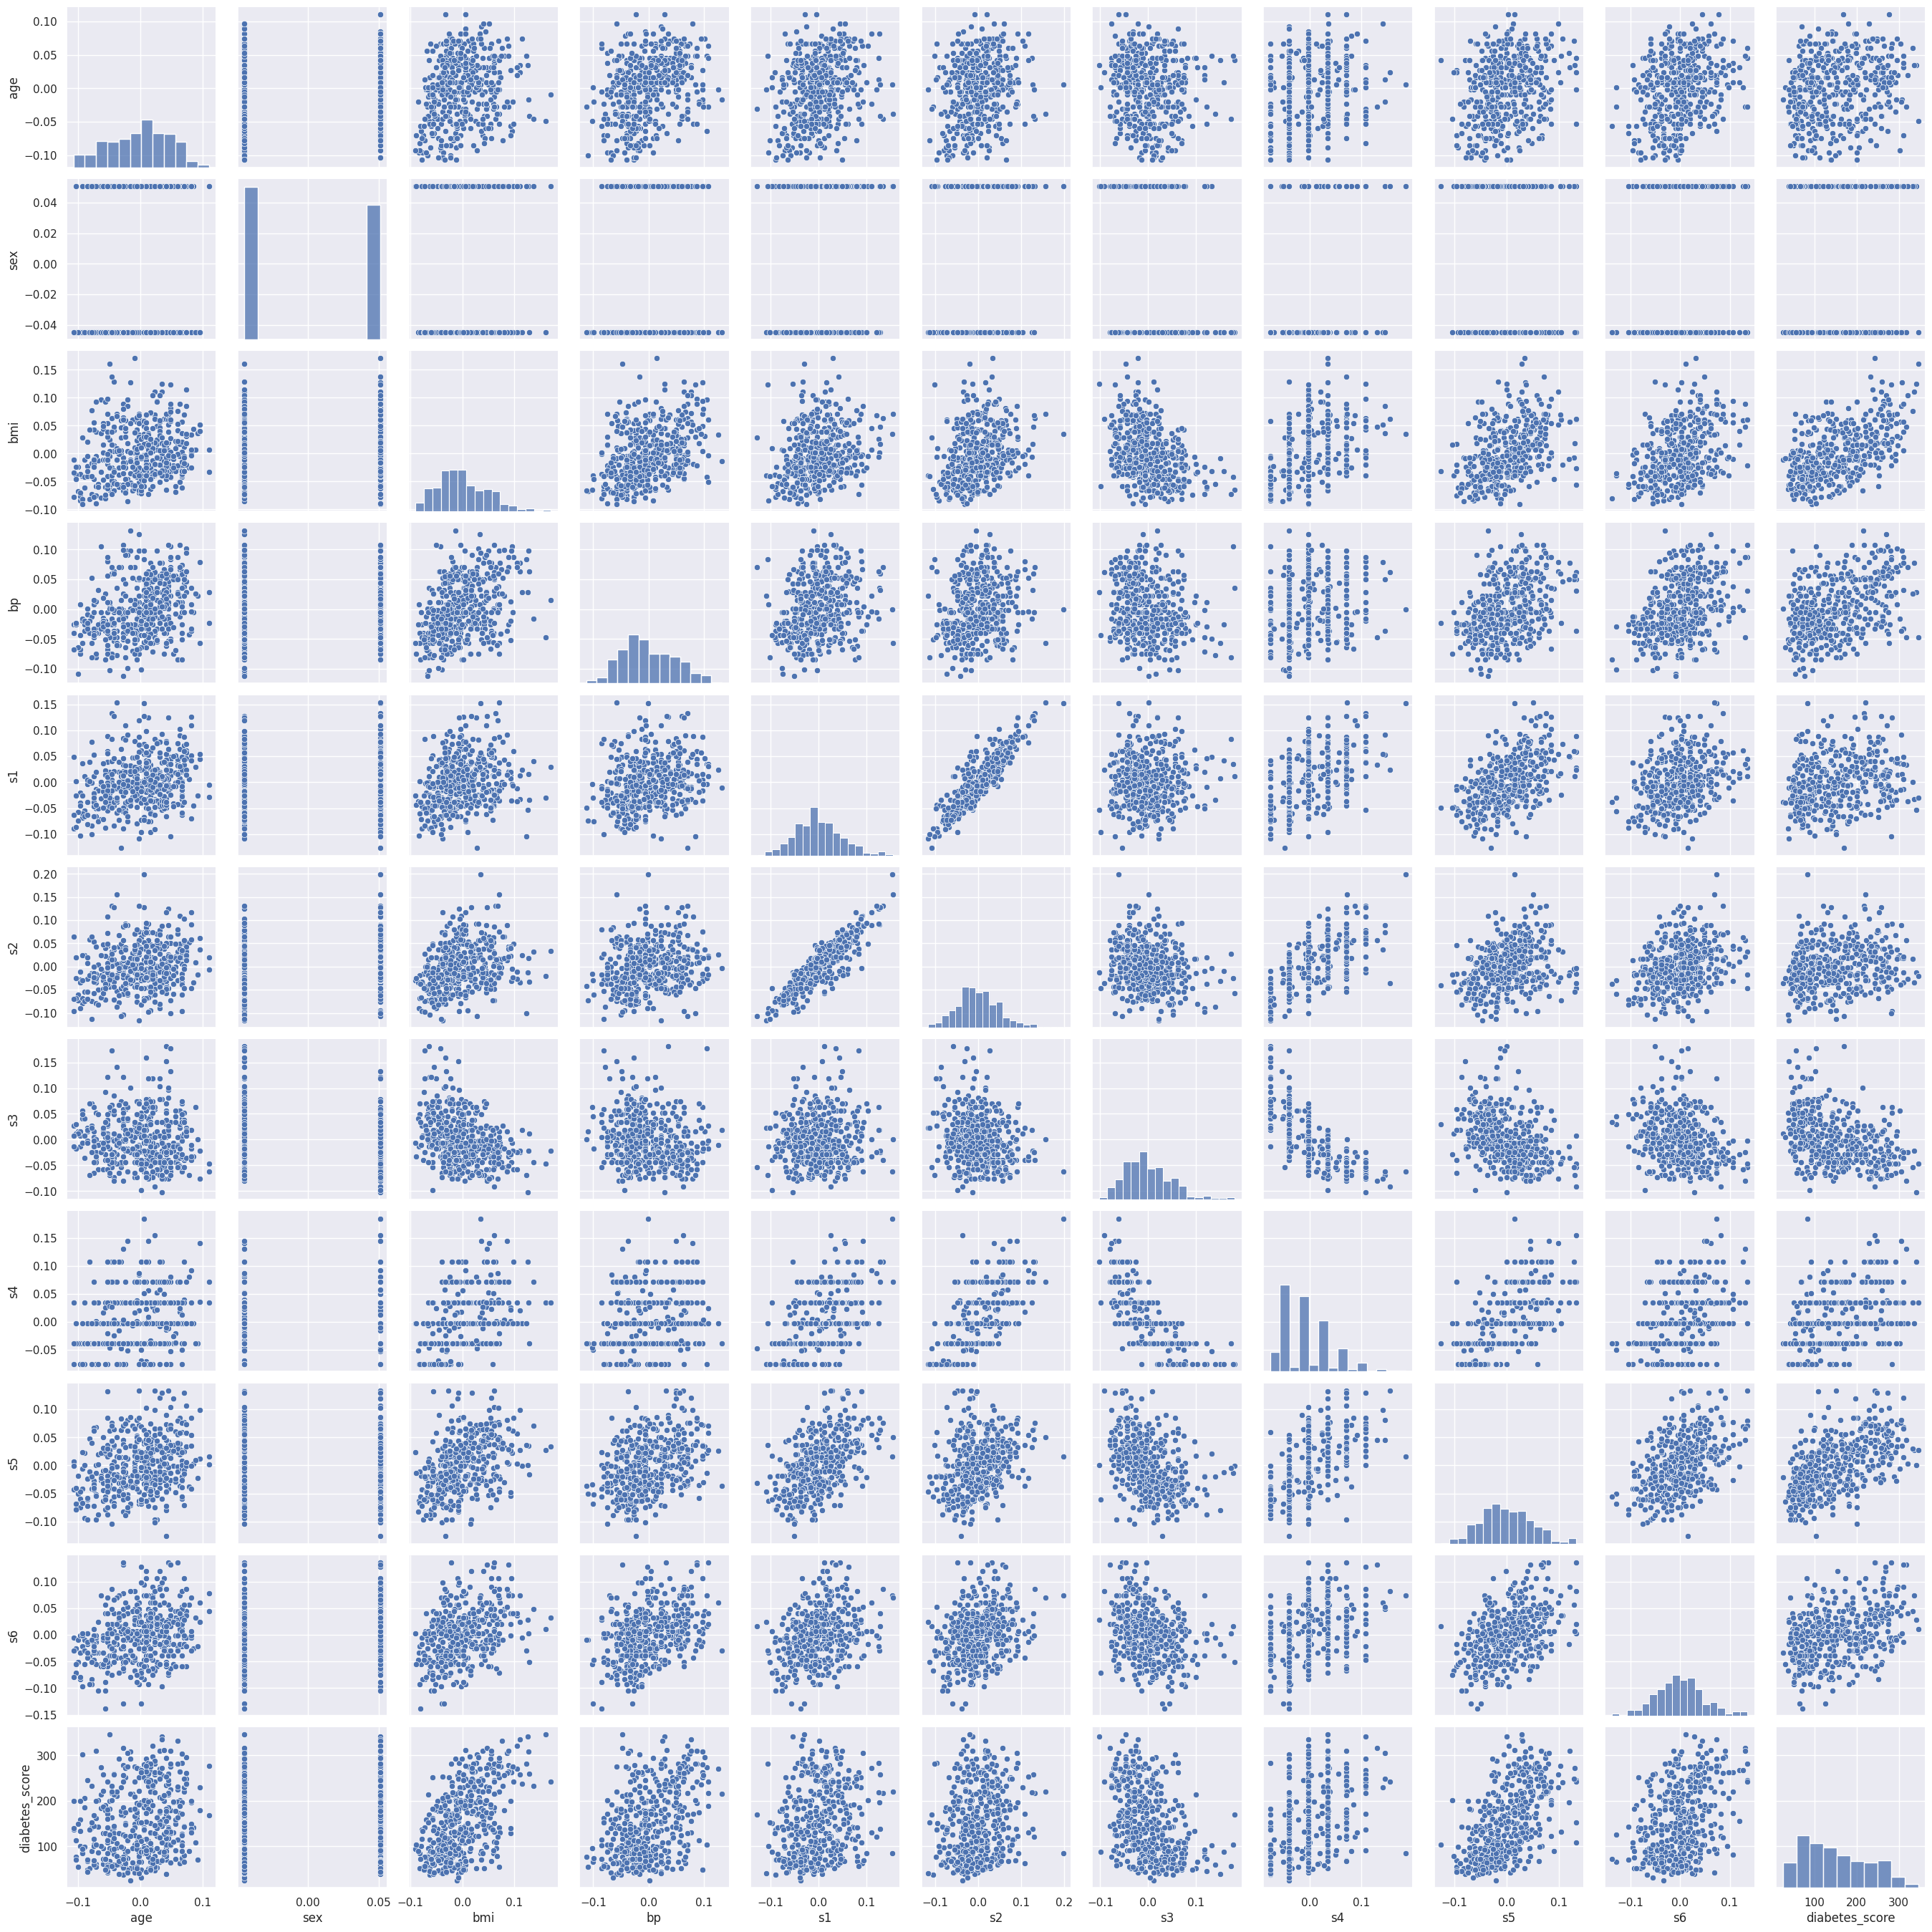

In [51]:
sns.pairplot(data=df)
plt.show()

scatter plot을 통해 sex가 categorical variable임을 알 수 있고, s1과 s2 사이에는 강한 선형성이 관찰된다.

#### b) data preprocessing
model fitting을 위해 데이터를 X와 Y로 나눈다.

In [53]:
X = df[['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']]
Y = df[['diabetes_score']]

#### c) model fitting
MLR에 위의 데이터를 fitting 한다.

In [54]:
# model fitting
from sklearn.linear_model import LinearRegression
mymodel = LinearRegression()
mymodel.fit(X,Y)

LinearRegression()

In [58]:
# result
print(f'intercept: {mymodel.intercept_}')
for i, feature_name in enumerate(mydata.feature_names):
  print(f'{feature_name} coef: {mymodel.coef_[0,i]}')

intercept: [152.13348416]
age coef: -10.009866299810684
sex coef: -239.81564367242237
bmi coef: 519.84592005446
bp coef: 324.38464550232356
s1 coef: -792.1756385522286
s2 coef: 476.7390210052569
s3 coef: 101.04326793803338
s4 coef: 177.06323767134643
s5 coef: 751.2736995571034
s6 coef: 67.62669218370515


In [63]:
type(mymodel.coef_)

numpy.ndarray

#### d) Test model
마지막으로 시각화와 $R^2$값을 이용해 model의 성능을 판단한다.

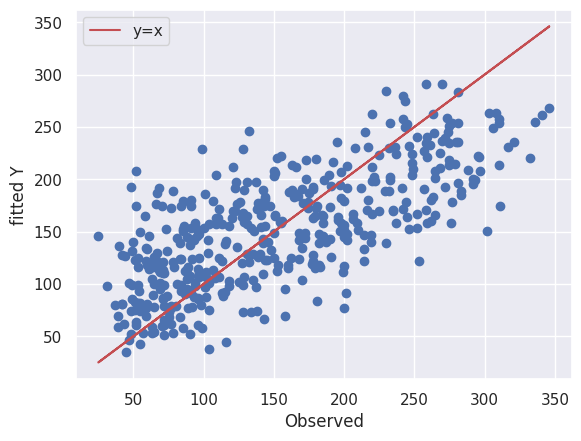

In [64]:
# Plotting the observed and fitting values
plt.scatter(Y, mymodel.predict(X), color="b")
plt.plot(Y, Y, color="r", label="y=x")
plt.xlabel("Observed")
plt.ylabel("fitted Y")
plt.legend()
plt.show()

$Y_i와 \hat{Y}_i$가 $y=x$ 주변에 가까이 분포되어 있다. 다음으로 $R^2$를 이용해 model의 성능을 판단한다.

In [65]:
print(round(mymodel.score(X,Y),3))

0.518


## **4. Classificaiton**


### (1) Logistic Regression
로지스틱 회귀분석은 예측값으로 확률을 계산하며 각 클래스에 속할 확률을 계산한다.

이때 계산 결과과 확률로 나오기 위해 로짓의 값을 입력받아 확률로 변환해주는 함수를 link function이라고 하며, logistic regression에서는 logit function이다.

**logit function:**

$logit(p) = log \frac{p}{1-p}$

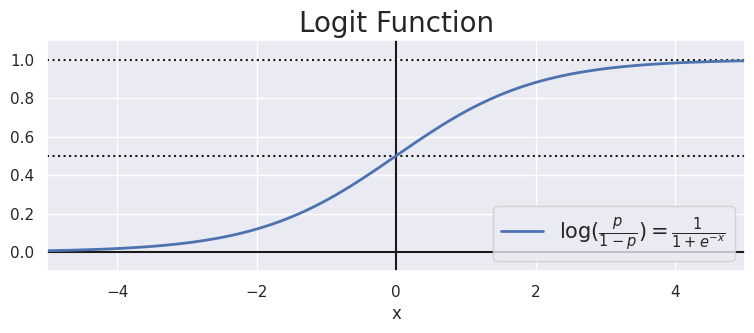

In [66]:
# plotting Logit function
x = np.linspace(-5,5,100)
odds = 1 / (1+np.exp(-x))
plt.figure(figsize=(9,3))
plt.plot([-5,5], [0,0], "k-")
plt.plot([-5,5], [0.5,0.5], "k:")
plt.plot([-5,5], [1,1], "k:")
plt.plot([0,0], [-1.1,1.1], "k-")
plt.plot(x, odds, "b-", linewidth=2, label=r"$\log(\frac{p}{1-p}) = \frac{1}{1+e^{-x}}$")
plt.title("Logit Function", fontsize=20)
plt.xlabel("x")
plt.legend(loc="lower right", fontsize=15)
plt.axis([-5,5,-0.1,1.1])
plt.show()

logistic regression의 예시를 보도록 한다.

데이터 분석의 목적은 학생들의 GPA 시험 성적을 이용한 합격 여부 예측이다.

#### a) import dataset

In [70]:
# import package
import pandas as pd
math = pd.read_csv("http://home.ewha.ac.kr/~josong/dm/mathcat.data", sep='\s+')
math.head()

,hsgpa,hsengl,hscalc,course,passed,outcome
1,78.0,80,Yes,Mainstrm,No,Failed
2,66.0,75,Yes,Mainstrm,Yes,Passed
3,80.2,70,Yes,Mainstrm,Yes,Passed
4,81.7,67,Yes,Mainstrm,Yes,Passed
5,86.8,80,Yes,Mainstrm,Yes,Passed


#### b) data preprocessing

In [71]:
# 필요없는 변수 제거
math = math.drop("outcome", axis=1)   # passed와 outcome의 결과가 동일

hscalc, course, passed는 범주형 변수로 python에서는 라벨 인코딩과 원-핫 인코딩이 필요하다.

각 변수의 범주의 빈도수를 확인한다.

In [72]:
math['hscalc'].value_counts()

,count
hscalc,
Yes,373
No,21


In [73]:
math['course'].value_counts()

,count
course,
Mainstrm,328
Catch-up,35
Elite,31


In [74]:
math['passed'].value_counts()

,count
passed,
Yes,236
No,158


**Y(target)에 해당되는 passed는 라벨 인코딩을 한다.**

In [77]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
items = math.columns[4::2] # passed열 인덱싱
le = LabelEncoder()

for i in items:
  math[i] = le.fit_transform(math[i])

In [78]:
math.head()

,hsgpa,hsengl,hscalc,course,passed
1,78.0,80,Yes,Mainstrm,0
2,66.0,75,Yes,Mainstrm,1
3,80.2,70,Yes,Mainstrm,1
4,81.7,67,Yes,Mainstrm,1
5,86.8,80,Yes,Mainstrm,1


In [79]:
mymath1 = math.copy()
mymath2 = math.copy()

**hscalc와 course는 범주형 변수이므로 원-핫 인코딩을 이용**한다. 파이썬에서는 범주형 변수에 대한 정의를 하지 않으므로 원-핫 인코딩 과정을 통해 범주형 변수임을 정의한다.

원-핫 인코딩을 하기 위한 두 가지 방법이 있다.

##### b-1) pandas의 pd.get_dummies 함수를 이용

In [80]:
import pandas as pd

##### b-2) sklearn의 OneHotEncoder를 이용